In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "umbria"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,10,Umbria,0,0,0,0,0,0,0,...,0.0,8.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
1,2020-02-26T18:00:00,10,Umbria,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
2,2020-02-27T18:00:00,10,Umbria,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
3,2020-02-28T18:00:00,10,Umbria,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
4,2020-02-29T17:00:00,10,Umbria,0,0,0,0,0,0,0,...,0.0,23.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2020-11-23T17:00:00,10,Umbria,371,78,449,10034,10483,-1089,105,...,4.0,448.0,191.0,-1095.0,17.37,4.28,23.44,54.97,4.00,0.907
273,2020-11-24T17:00:00,10,Umbria,368,72,440,9757,10197,-286,218,...,10.0,4653.0,1592.0,-277.0,16.36,4.31,4.69,13.69,-7.69,2.080
274,2020-11-25T17:00:00,10,Umbria,361,70,431,9506,9937,-260,386,...,8.0,4331.0,1705.0,-251.0,16.24,4.34,8.91,22.64,-2.78,3.785
275,2020-11-26T17:00:00,10,Umbria,349,68,417,9017,9434,-503,343,...,14.0,4791.0,1640.0,-489.0,16.31,4.42,7.16,20.91,-2.86,3.452


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 27, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 261
Nuovi tamponi: 3955.0
Percentuale nuovi positivi/nuovi tamponi: 6.6000000000000005 %
Nuovi guariti: 631.0
Nuovi deceduti: 14.0
Variazione positivi ricoverati con sintomi: 4.0
Variazione positivi in terapia intensiva: -6.0
Variazione positivi in isolamento dimiciliare: -382.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 27, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-28T17:00:00,10,Umbria,38,3,41,467,508,7,11,...,0.0,601.0,328.0,2.0,7.32,8.07,1.83,3.35,0.00,2.196
1,2020-09-29T17:00:00,10,Umbria,39,3,42,478,520,12,23,...,0.0,2633.0,1305.0,11.0,7.14,8.08,0.87,1.76,0.00,4.528
2,2020-09-30T17:00:00,10,Umbria,39,3,42,495,537,17,46,...,0.0,1940.0,1046.0,17.0,7.14,7.82,2.37,4.40,0.00,8.846
3,2020-10-01T17:00:00,10,Umbria,38,3,41,521,562,25,46,...,0.0,1931.0,1115.0,26.0,7.32,7.30,2.38,4.13,0.00,8.566
4,2020-10-02T17:00:00,10,Umbria,39,4,43,567,610,48,62,...,0.0,1925.0,1042.0,46.0,9.30,7.05,3.22,5.95,33.33,11.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-23T17:00:00,10,Umbria,371,78,449,10034,10483,-1089,105,...,4.0,448.0,191.0,-1095.0,17.37,4.28,23.44,54.97,4.00,0.907
57,2020-11-24T17:00:00,10,Umbria,368,72,440,9757,10197,-286,218,...,10.0,4653.0,1592.0,-277.0,16.36,4.31,4.69,13.69,-7.69,2.080
58,2020-11-25T17:00:00,10,Umbria,361,70,431,9506,9937,-260,386,...,8.0,4331.0,1705.0,-251.0,16.24,4.34,8.91,22.64,-2.78,3.785
59,2020-11-26T17:00:00,10,Umbria,349,68,417,9017,9434,-503,343,...,14.0,4791.0,1640.0,-489.0,16.31,4.42,7.16,20.91,-2.86,3.452


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

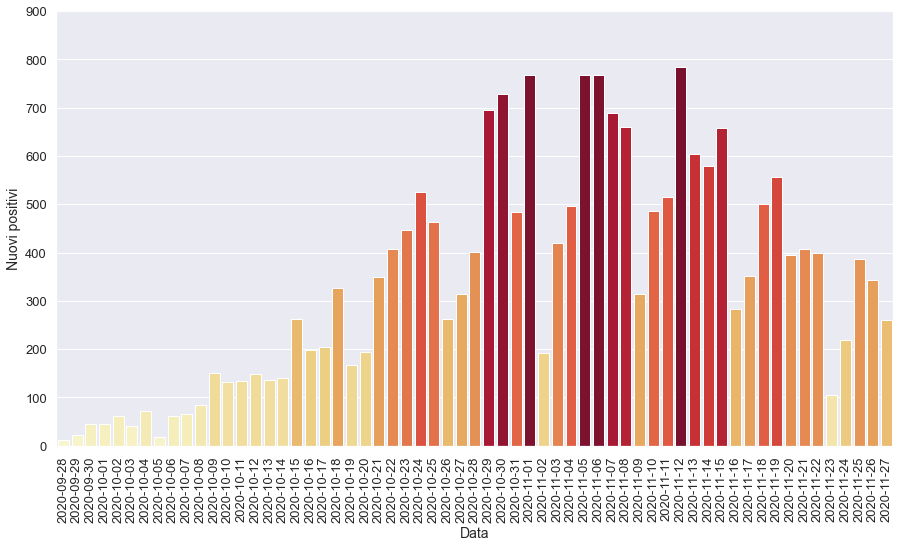

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

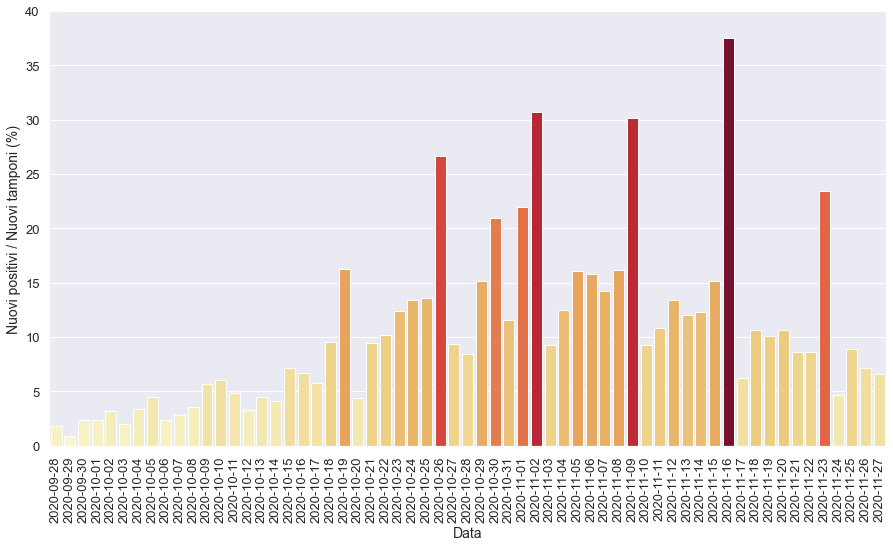

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

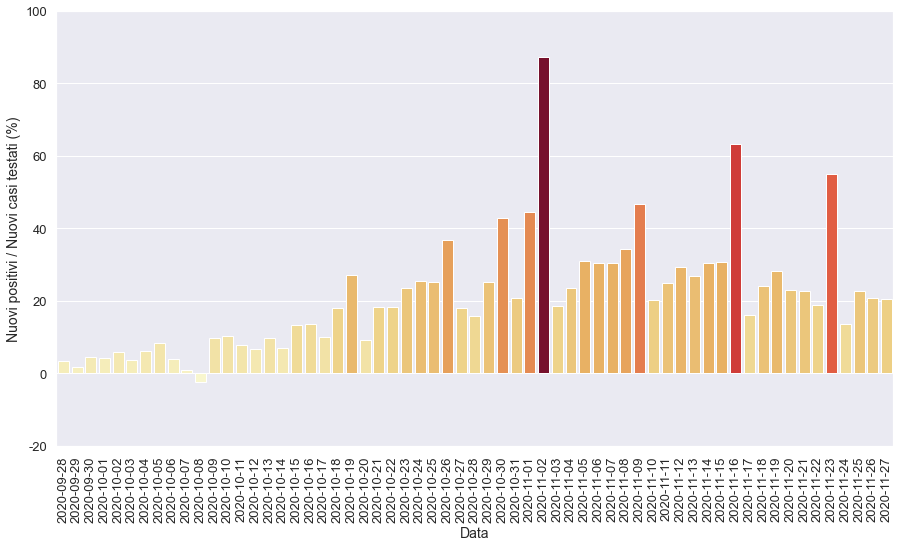

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

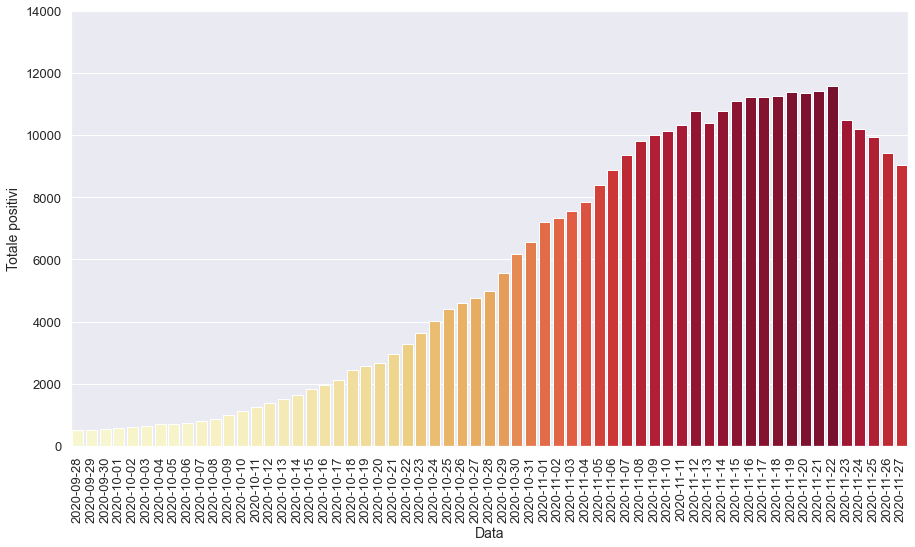

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

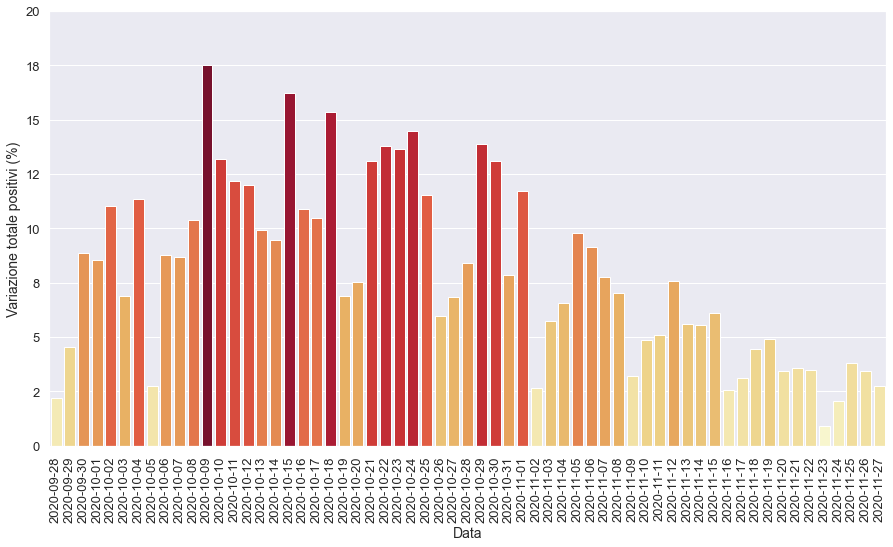

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

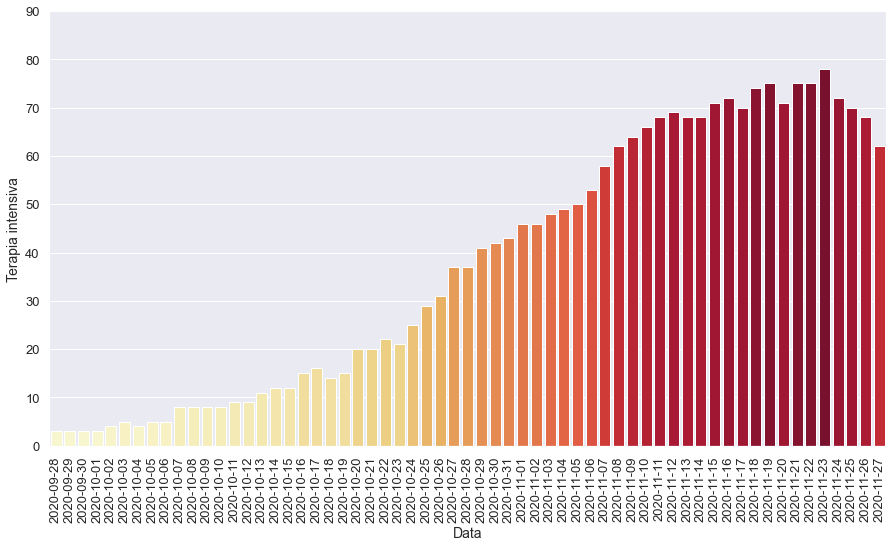

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

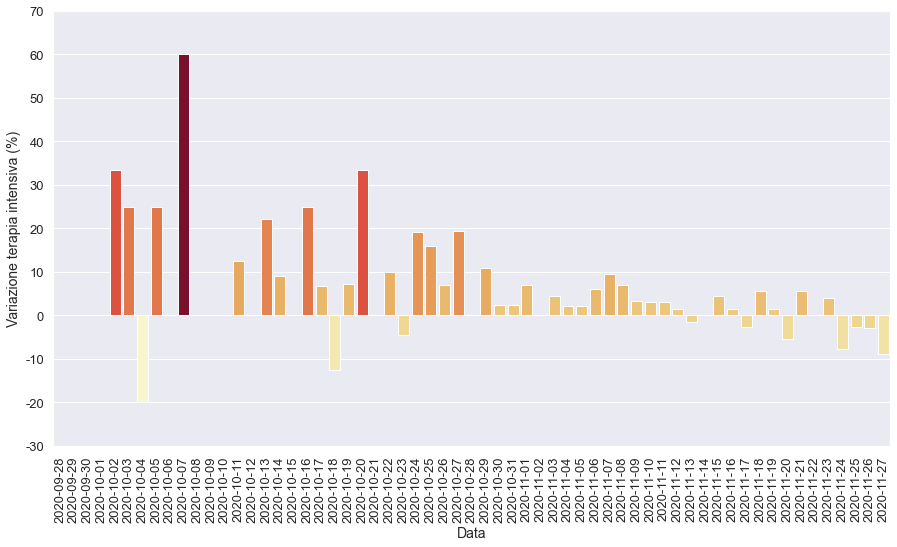

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

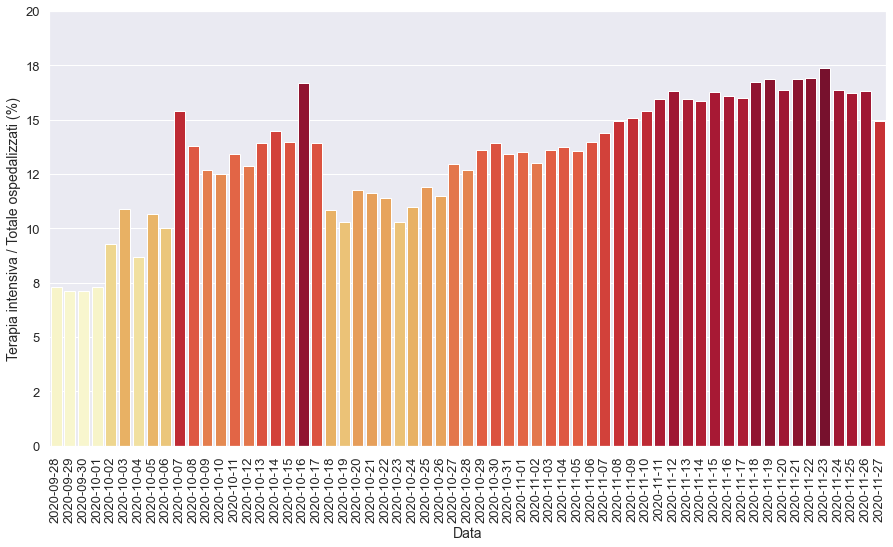

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

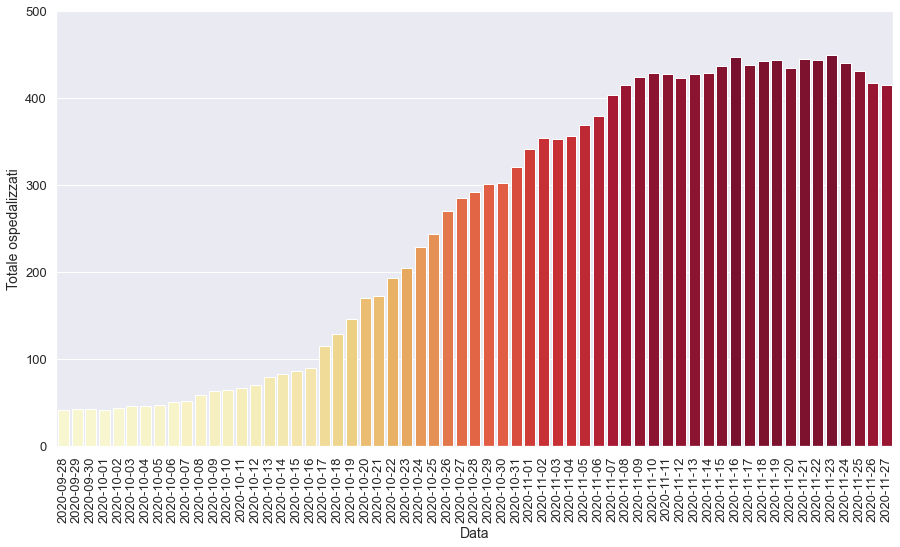

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

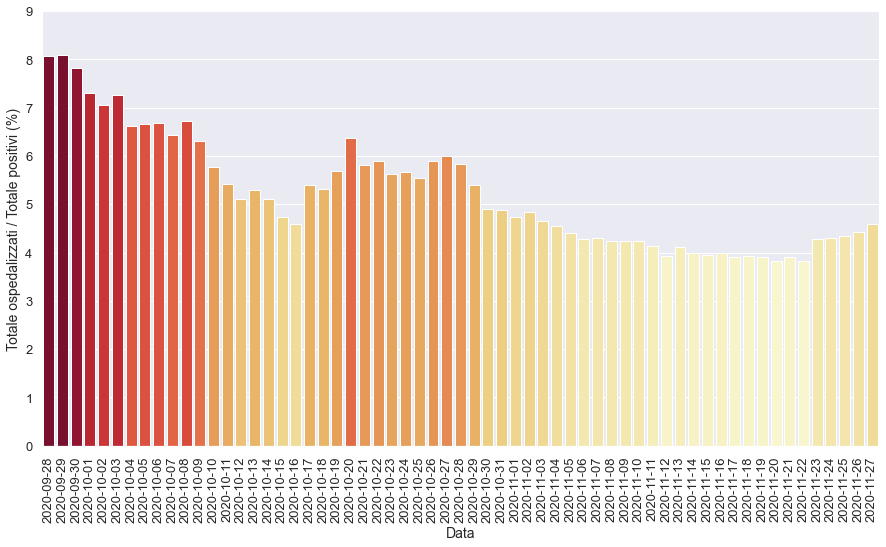

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

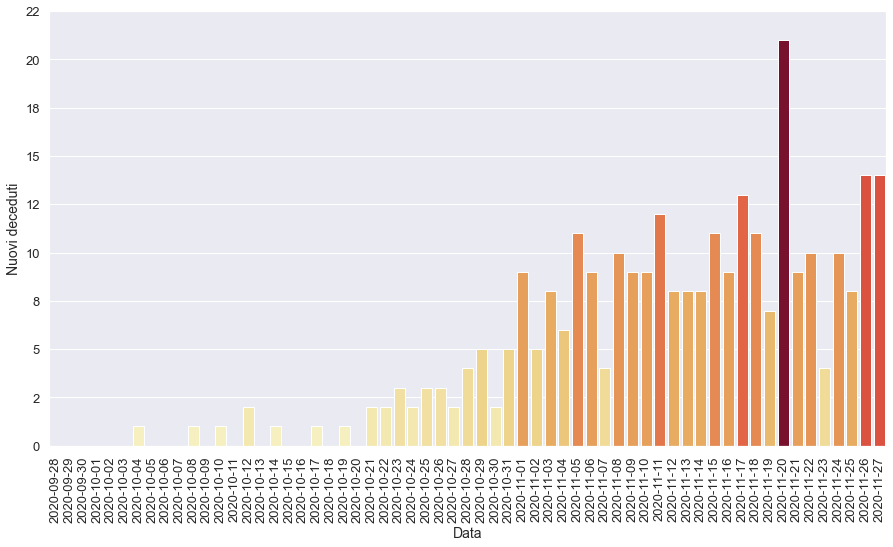

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

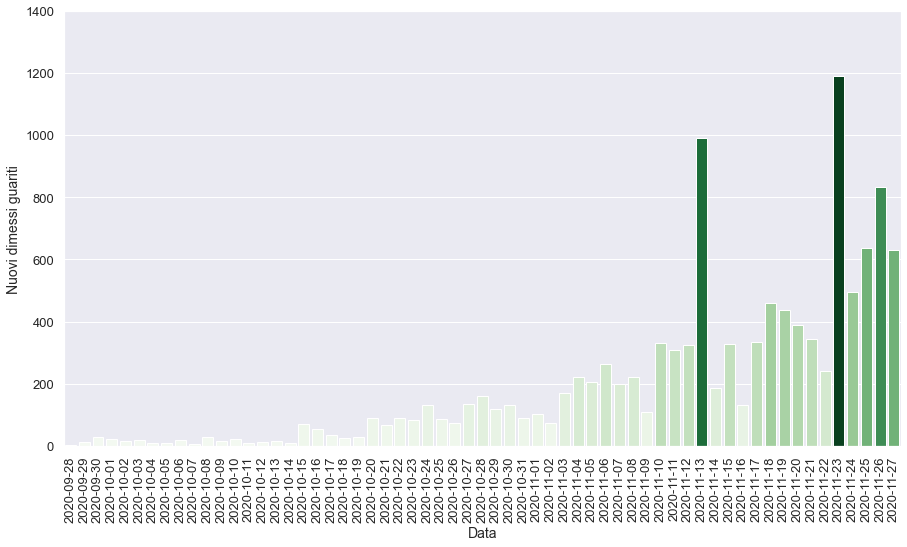

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-28T17:00:00,10,Umbria,255,37,292,4707,4999,238,401,...,4.0,4746.0,2544.0,231.0,12.67,5.84,8.45,15.76,0.00,8.423
1,2020-10-29T17:00:00,10,Umbria,260,41,301,5270,5571,572,694,...,5.0,4584.0,2754.0,563.0,13.62,5.40,15.14,25.20,10.81,13.883
2,2020-10-30T17:00:00,10,Umbria,260,42,302,5864,6166,595,729,...,2.0,3487.0,1702.0,594.0,13.91,4.90,20.91,42.83,2.44,13.086
3,2020-10-31T17:00:00,10,Umbria,277,43,320,6234,6554,388,483,...,5.0,4177.0,2312.0,370.0,13.44,4.88,11.56,20.89,2.38,7.833
4,2020-11-01T17:00:00,10,Umbria,295,46,341,6869,7210,656,768,...,9.0,3489.0,1721.0,635.0,13.49,4.73,22.01,44.63,6.98,11.718
5,2020-11-02T17:00:00,10,Umbria,308,46,354,6972,7326,116,193,...,5.0,628.0,221.0,103.0,12.99,4.83,30.73,87.33,0.00,2.677
6,2020-11-03T17:00:00,10,Umbria,305,48,353,7214,7567,241,420,...,8.0,4540.0,2263.0,242.0,13.60,4.66,9.25,18.56,4.35,5.733
7,2020-11-04T17:00:00,10,Umbria,307,49,356,7480,7836,269,496,...,6.0,3985.0,2098.0,266.0,13.76,4.54,12.45,23.64,2.08,6.555
8,2020-11-05T17:00:00,10,Umbria,319,50,369,8020,8389,553,768,...,11.0,4768.0,2479.0,540.0,13.55,4.40,16.11,30.98,2.04,9.801
9,2020-11-06T17:00:00,10,Umbria,326,53,379,8506,8885,496,767,...,9.0,4855.0,2511.0,486.0,13.98,4.27,15.80,30.55,6.00,9.143


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

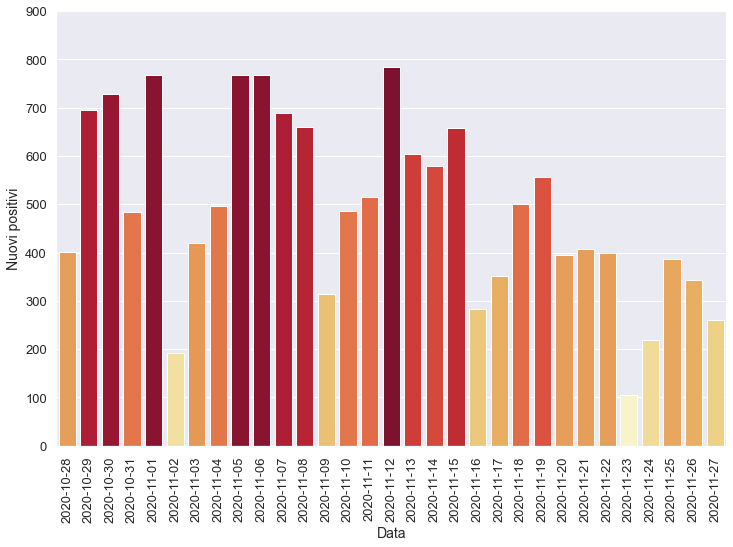

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

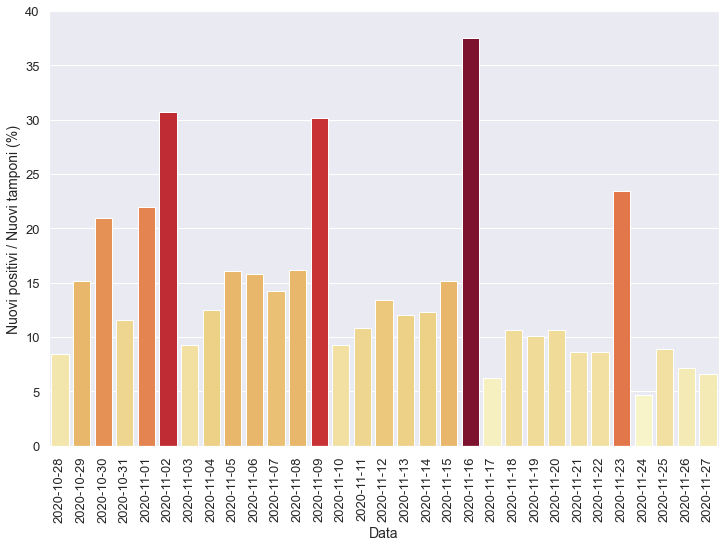

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

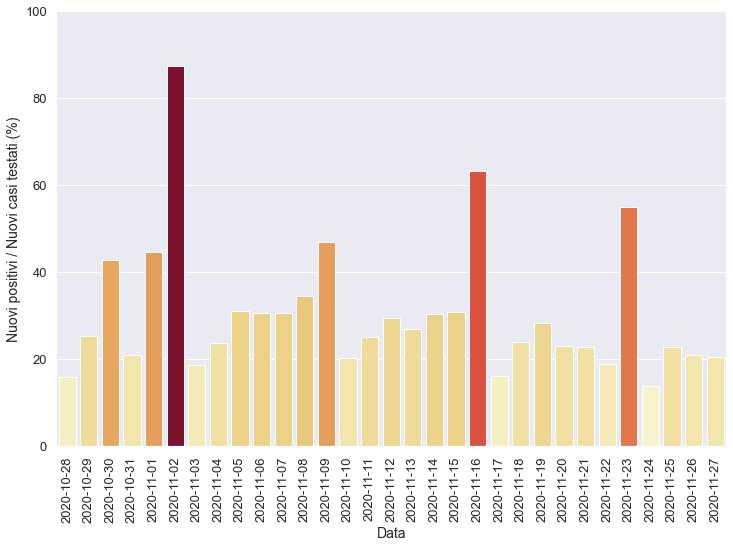

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

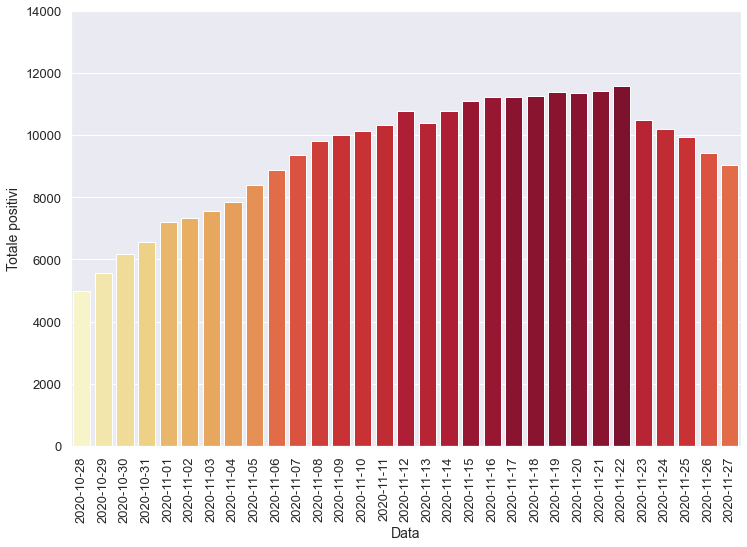

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

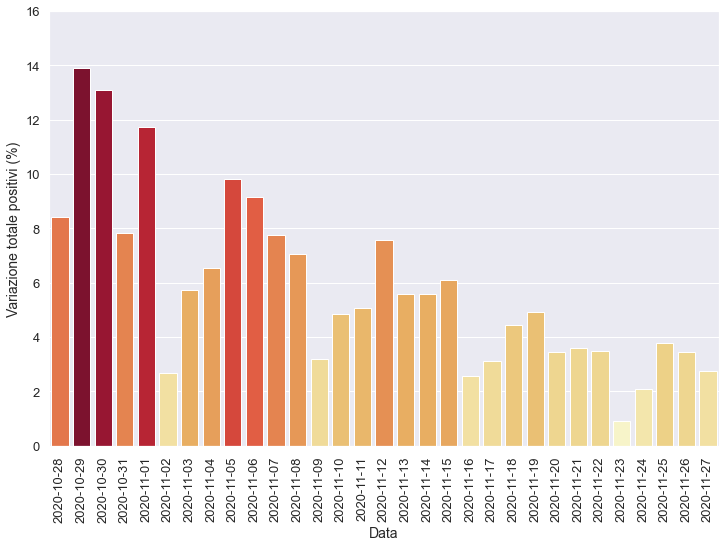

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

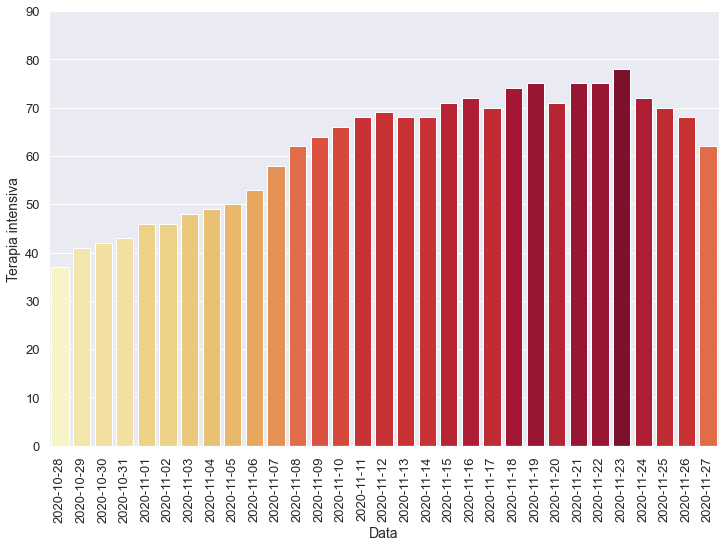

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

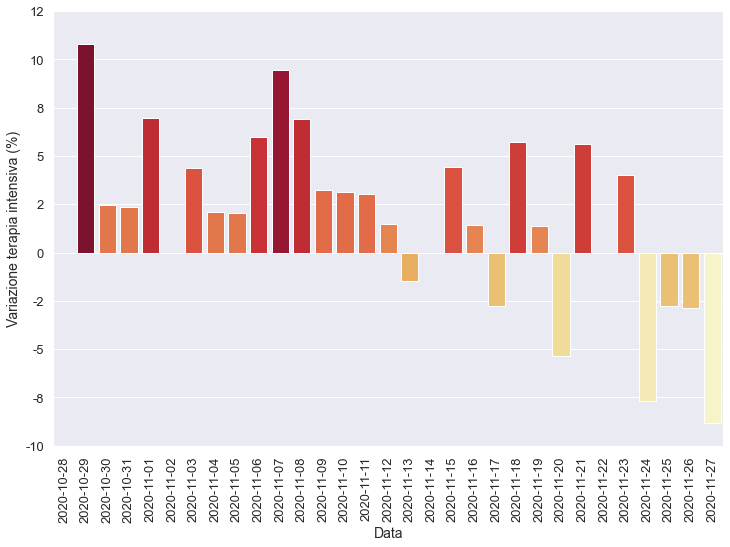

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

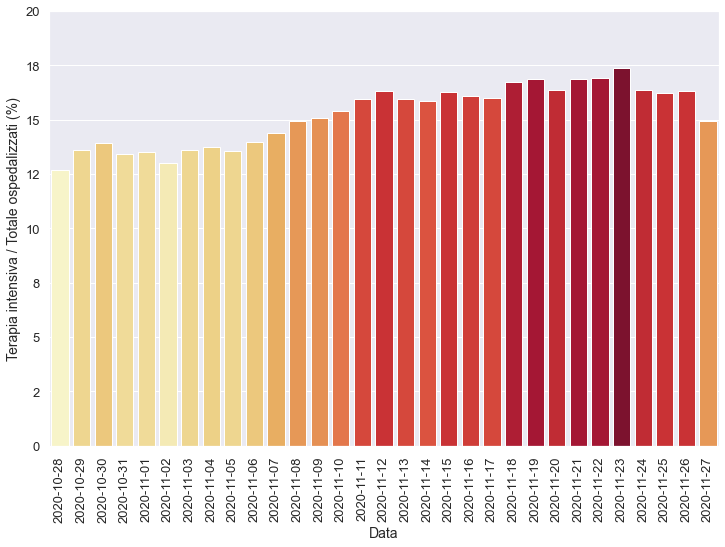

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

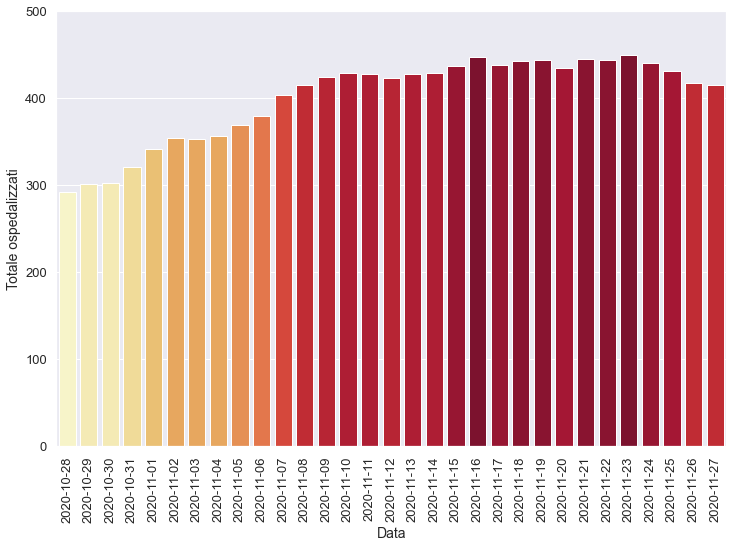

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

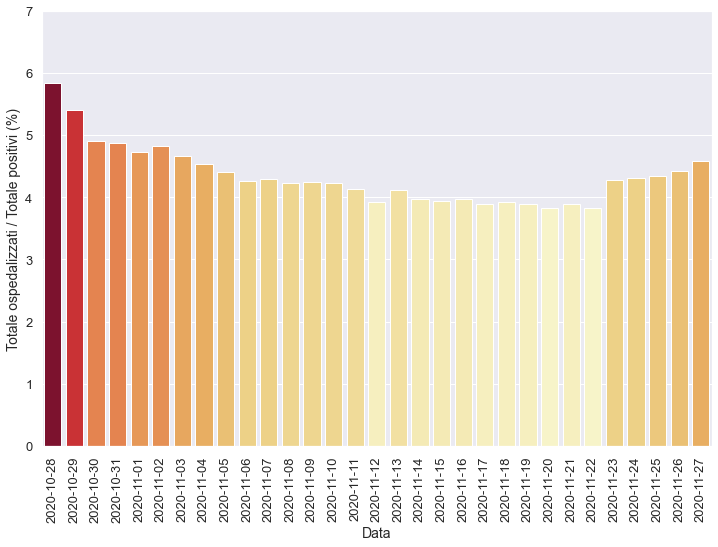

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

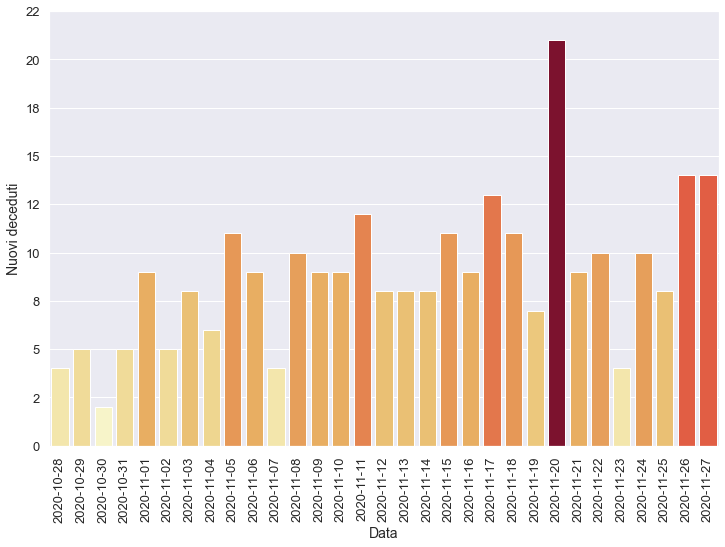

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

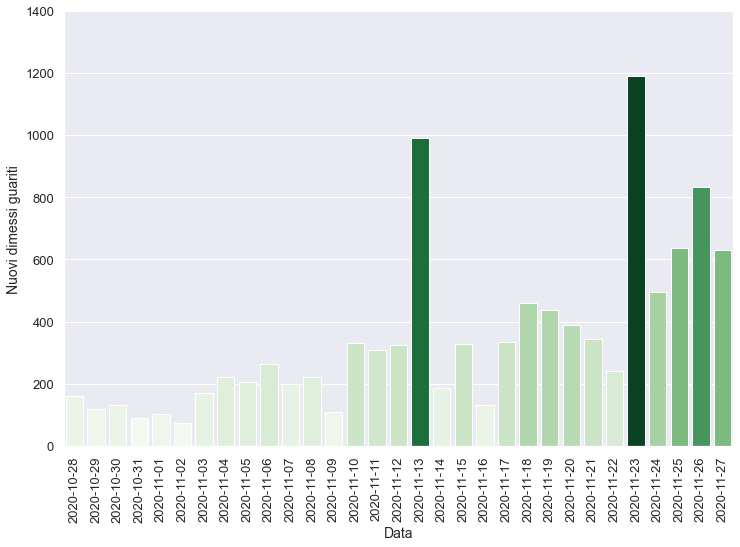

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-20T17:00:00,10,Umbria,363,71,434,10934,11368,-17,394,...,21.0,3703.0,1711.0,-7.0,16.36,3.82,10.64,23.03,-5.33,3.461
1,2020-11-21T17:00:00,10,Umbria,370,75,445,10978,11423,55,408,...,9.0,4748.0,1803.0,44.0,16.85,3.90,8.59,22.63,5.63,3.589
2,2020-11-22T17:00:00,10,Umbria,368,75,443,11129,11572,149,400,...,10.0,4641.0,2119.0,151.0,16.93,3.83,8.62,18.88,0.00,3.502
3,2020-11-23T17:00:00,10,Umbria,371,78,449,10034,10483,-1089,105,...,4.0,448.0,191.0,-1095.0,17.37,4.28,23.44,54.97,4.00,0.907
4,2020-11-24T17:00:00,10,Umbria,368,72,440,9757,10197,-286,218,...,10.0,4653.0,1592.0,-277.0,16.36,4.31,4.69,13.69,-7.69,2.080
5,2020-11-25T17:00:00,10,Umbria,361,70,431,9506,9937,-260,386,...,8.0,4331.0,1705.0,-251.0,16.24,4.34,8.91,22.64,-2.78,3.785
6,2020-11-26T17:00:00,10,Umbria,349,68,417,9017,9434,-503,343,...,14.0,4791.0,1640.0,-489.0,16.31,4.42,7.16,20.91,-2.86,3.452
7,2020-11-27T17:00:00,10,Umbria,353,62,415,8635,9050,-384,261,...,14.0,3955.0,1275.0,-382.0,14.94,4.59,6.60,20.47,-8.82,2.767


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

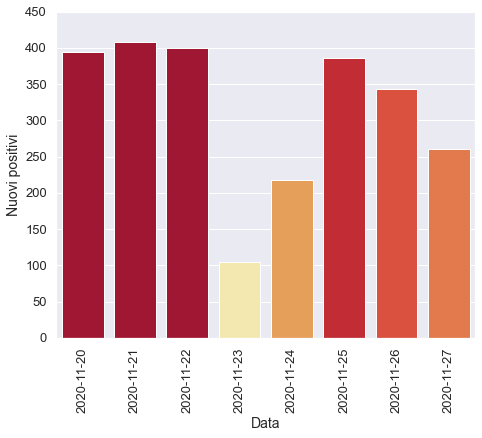

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

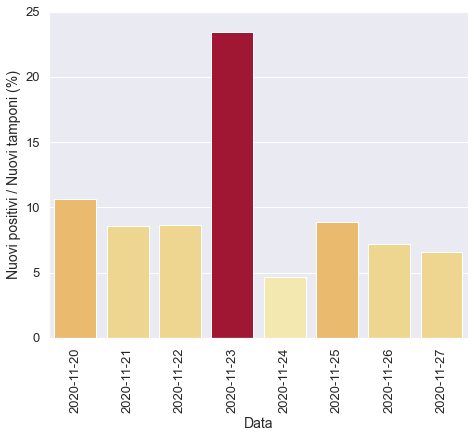

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

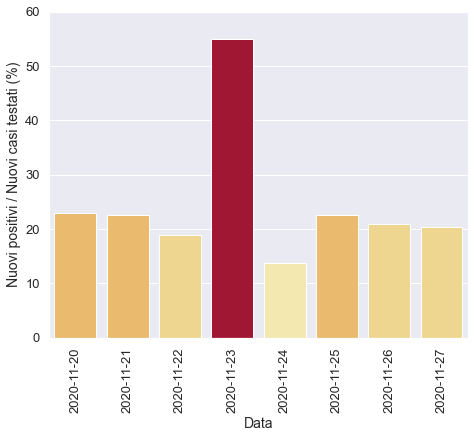

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

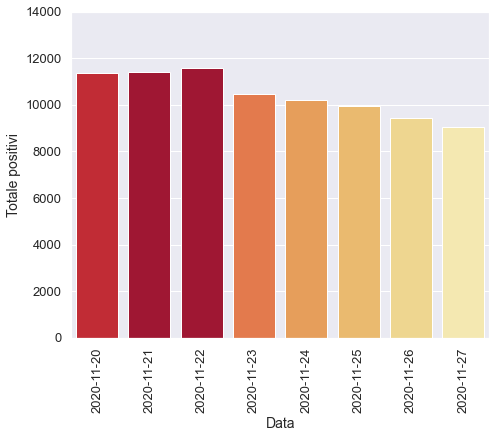

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

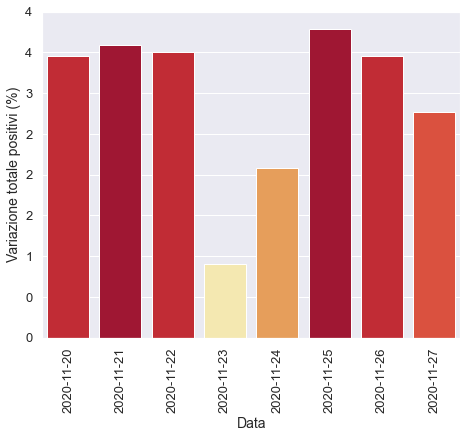

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

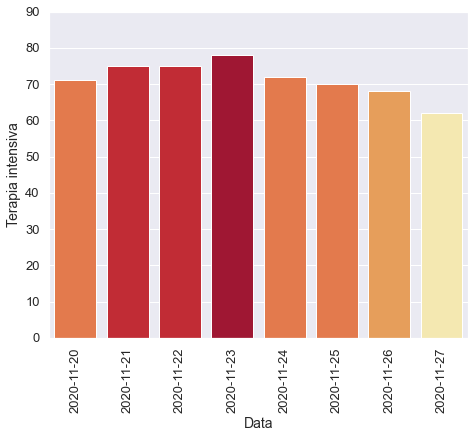

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

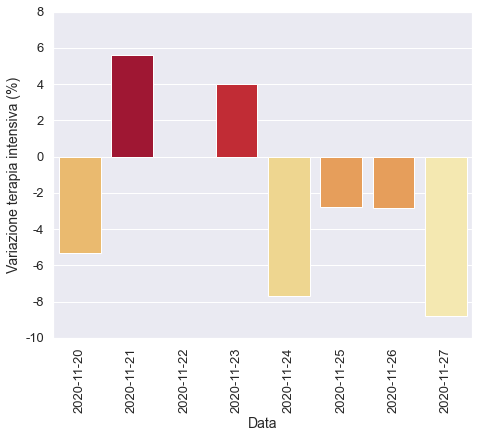

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

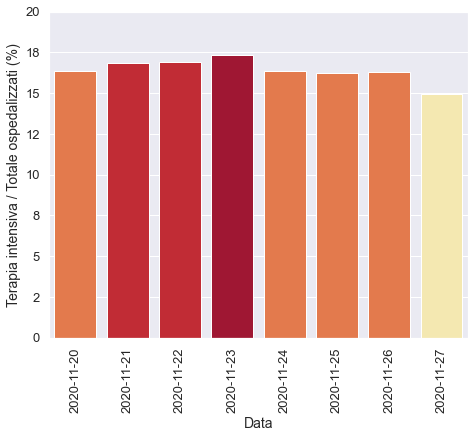

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

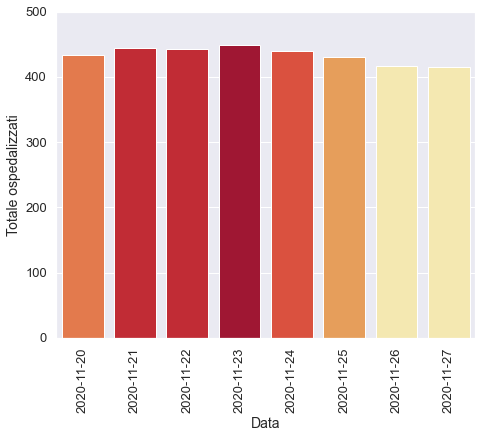

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

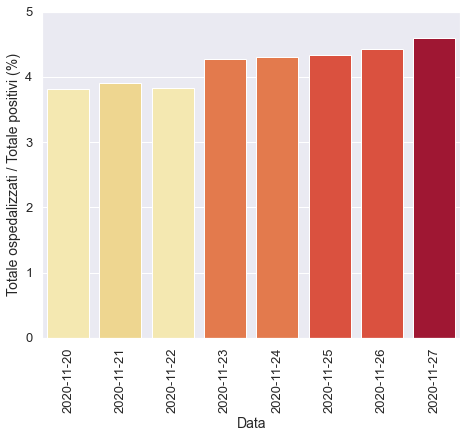

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

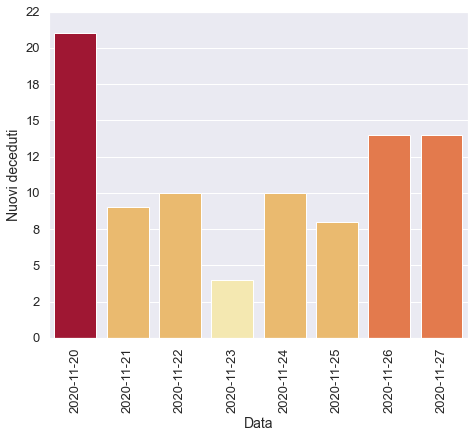

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

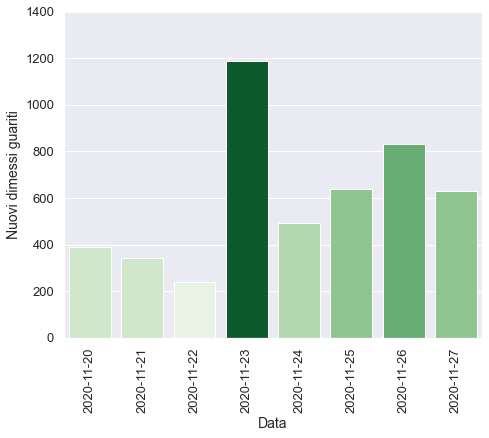

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)